# Variational Quantum Time Evolution

In [1]:
from qiskit.quantum_info import SparsePauliOp

hamiltonian = SparsePauliOp(['ZZ',  'IX', 'XI'],
              coeffs=[-0.2 , -1, -1])

magnetization = SparsePauliOp([ 'IZ', 'ZI'], coeffs=[1, 1])

In [3]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)
ansatz.decompose().draw()

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[2]) ├──■──┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘

In [4]:
import numpy as np

init_param_values={}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]]=np.pi/2

In [6]:
from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple

var_principle = ImaginaryMcLachlanPrinciple()

In [7]:
from qiskit_algorithms import TimeEvolutionProblem

time = 5.0
aux_ops = [hamiltonian]
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)

In [8]:
from qiskit_algorithms import VarQITE
from qiskit.primitives import Estimator

var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
# an Estimator instance is necessary, if we want to calculate the expectation value of auxiliary operators.
evolution_result = var_qite.evolve(evolution_problem)

In [9]:
from qiskit.quantum_info import Statevector

init_state = Statevector(ansatz.assign_parameters(init_param_values))

In [10]:
from qiskit_algorithms import SciPyImaginaryEvolver

evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=501)
sol = exact_evol.evolve(evolution_problem)

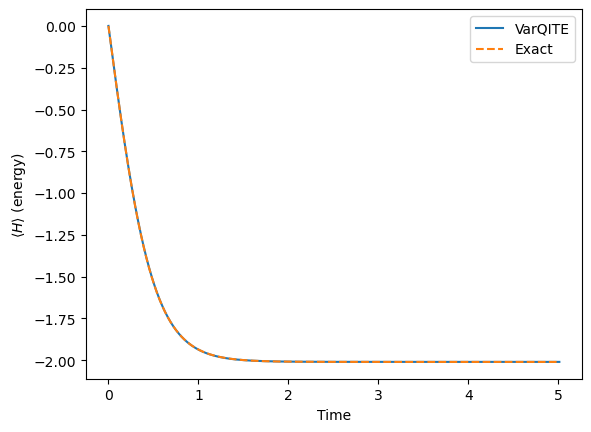

In [11]:
import pylab

h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

In [12]:
print("Ground state energy", h_exp_val[-1])

Ground state energy -2.0097479079521197


In [13]:
from qiskit_algorithms.gradients import ReverseEstimatorGradient, ReverseQGT

var_principle = ImaginaryMcLachlanPrinciple(qgt=ReverseQGT() , gradient=ReverseEstimatorGradient())
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result_eff = var_qite.evolve(evolution_problem)

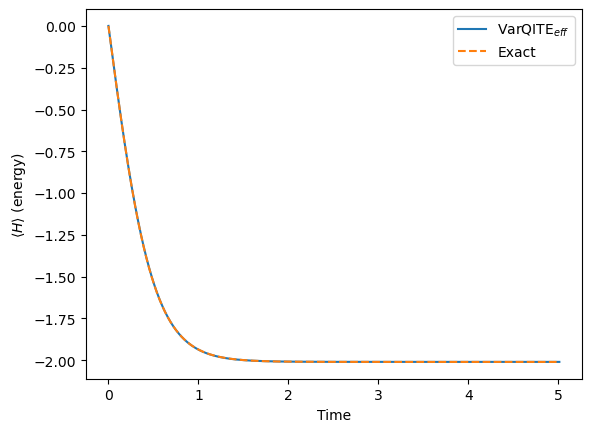

In [14]:
h_exp_val_eff = np.array([ele[0][0] for ele in evolution_result_eff.observables])

exact_h_exp_val_eff = sol.observables[0][0].real

times = evolution_result_eff.times
pylab.plot(times, h_exp_val_eff, label= r"VarQITE$_{eff}$")
pylab.plot(times, exact_h_exp_val_eff , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

In [16]:
print("Ground state energy", h_exp_val_eff[-1])

Ground state energy -2.0097479079521197


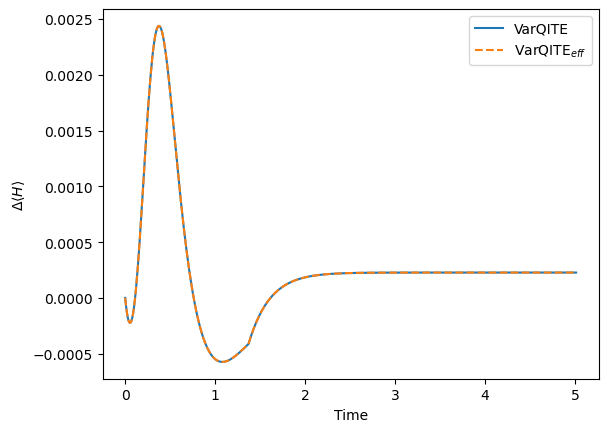

In [17]:
pylab.plot(times, (h_exp_val-exact_h_exp_val), label="VarQITE")
pylab.plot(times, (h_exp_val_eff-exact_h_exp_val_eff), label=r"VarQITE$_{eff}$",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\Delta \langle H \rangle$")
pylab.legend(loc="upper right");

In [18]:
ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)
ansatz.decompose().draw()

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[2]) ├──■──┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘

In [19]:
init_param_values = {}

for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = np.pi/2 # initialize the parameters which also decide the initial state

In [20]:
init_state = Statevector(ansatz.assign_parameters(init_param_values))
print(init_state)
Statevector([-5.00000000e-01+0.00000000e+00j,
             -5.00000000e-01-5.55111512e-17j,
              0.00000000e+00-5.00000000e-01j,
              1.66533454e-16+5.00000000e-01j],
            dims=(2, 2))

Statevector([-5.00000000e-01+5.07326818e-18j,
             -5.00000000e-01-6.66967228e-17j,
              3.89411472e-17-5.00000000e-01j,
              1.55347882e-16+5.00000000e-01j],
            dims=(2, 2))
Statevector([-5.00000000e-01+0.00000000e+00j,
             -5.00000000e-01-5.55111512e-17j,
              0.00000000e+00-5.00000000e-01j,
              1.66533454e-16+5.00000000e-01j],
            dims=(2, 2))


In [21]:
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple

var_principle = RealMcLachlanPrinciple()

In [22]:
aux_ops = [magnetization]

In [23]:
from qiskit_algorithms import VarQRTE

time = 10.0
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qrte = VarQRTE(ansatz, init_param_values,var_principle, Estimator())
evolution_result_re = var_qrte.evolve(evolution_problem)

In [25]:
init_circ = ansatz.assign_parameters(init_param_values)

In [26]:
from qiskit_algorithms import SciPyRealEvolver

evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state = init_circ, aux_operators=aux_ops)
rtev = SciPyRealEvolver(1001)
sol = rtev.evolve(evolution_problem)

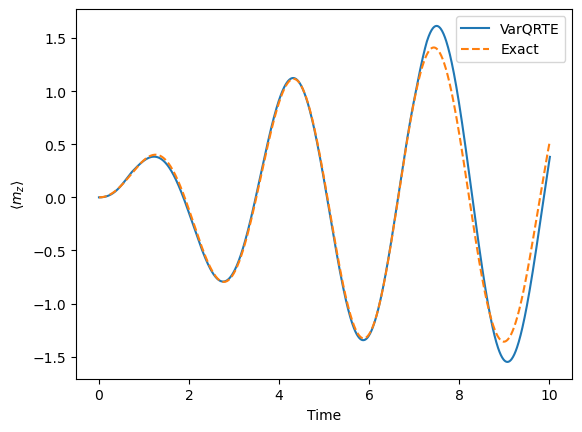

In [27]:
mz_exp_val_re = np.array([ele[0][0] for ele in evolution_result_re.observables])
exact_mz_exp_val_re = sol.observables[0][0].real
times = evolution_result_re.times
pylab.plot(times, mz_exp_val_re, label= "VarQRTE")
pylab.plot(times, exact_mz_exp_val_re , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle m_z \rangle$")
pylab.legend(loc="upper right");

In [28]:
from qiskit_algorithms.gradients import DerivativeType

var_principle = RealMcLachlanPrinciple(qgt=ReverseQGT() , gradient=ReverseEstimatorGradient(derivative_type=DerivativeType.IMAG))
time = 10.0
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qrte = VarQRTE(ansatz, init_param_values,var_principle, Estimator())
evolution_result_re_eff = var_qrte.evolve(evolution_problem)

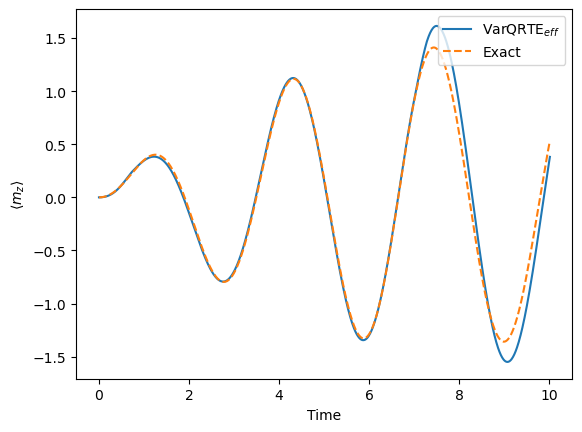

In [29]:
mz_exp_val_re_eff = np.array([ele[0][0] for ele in evolution_result_re_eff.observables])
pylab.plot(times, mz_exp_val_re_eff, label= r"VarQRTE$_{eff}$")
pylab.plot(times, exact_mz_exp_val_re , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle m_z \rangle$")
pylab.legend(loc="upper right");

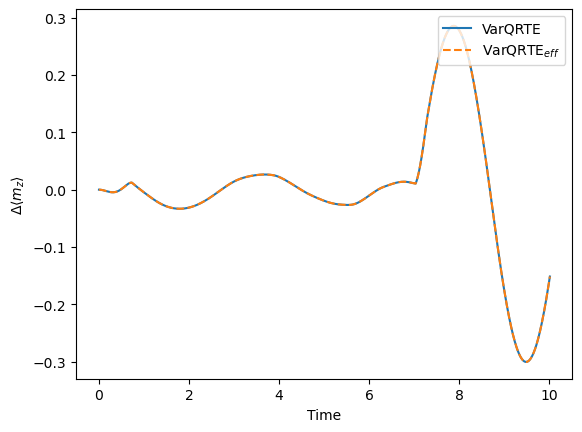

In [30]:
pylab.plot(times, (mz_exp_val_re-exact_mz_exp_val_re), label= "VarQRTE")
pylab.plot(times, (mz_exp_val_re_eff-exact_mz_exp_val_re), label= r"VarQRTE$_{eff}$",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\Delta \langle m_z \rangle$")
pylab.legend(loc="upper right");